In [24]:
%pip install pandas matplotlib seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

  Using cached pandas-3.0.0-cp313-cp313-macosx_11_0_arm64.whl.metadata (79 kB)
  Using cached matplotlib-3.10.8-cp313-cp313-macosx_11_0_arm64.whl.metadata (52 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached numpy-2.4.2-cp313-cp313-macosx_14_0_arm64.whl.metadata (6.6 kB)
  Using cached contourpy-1.3.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.61.1-cp313-cp313-macosx_10_13_universal2.whl.metadata (114 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-macosx_11_0_arm64.whl.metadata (6.3 kB)
  Using cached pillow-12.1.0-cp313-cp313-macosx_11_0_arm64.whl.metadata (8.8 kB)
  Using cached pyparsing-3.3.2-py3-none-any.whl.metadata (5.8 kB)
Using cached pandas-3.0.0-cp313-cp313-macosx_11_0_arm64.whl (9.9 MB)
Using cached matplotlib-3.10.8-cp313-cp313-macosx_11_0_arm64.whl (8.1 MB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached contourpy-1.3.3

In [25]:
# load the data set
df = pd.read_csv('customer_churn_dataset.csv')

In [26]:
# look at the first 5 rows
df.head()

,customer_id,tenure,monthly_charges,total_charges,contract,payment_method,internet_service,tech_support,online_security,support_calls,churn
0,1,52,54.20,2818.40,Month-to-month,Credit,DSL,No,Yes,1,No
1,2,15,35.28,529.20,Month-to-month,Debit,DSL,No,No,2,No
2,3,72,78.24,5633.28,Month-to-month,Debit,DSL,No,No,0,No
3,4,61,80.24,4894.64,One year,Cash,Fiber,Yes,Yes,0,No
4,5,21,39.38,826.98,Month-to-month,UPI,Fiber,No,No,4,Yes


In [29]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       20000 non-null  int64  
 1   tenure            20000 non-null  int64  
 2   monthly_charges   20000 non-null  float64
 3   total_charges     20000 non-null  float64
 4   contract          20000 non-null  str    
 5   payment_method    20000 non-null  str    
 6   internet_service  17987 non-null  str    
 7   tech_support      20000 non-null  str    
 8   online_security   20000 non-null  str    
 9   support_calls     20000 non-null  int64  
 10  churn             20000 non-null  str    
dtypes: float64(2), int64(3), str(6)
memory usage: 1.7 MB


In [30]:
# check for any nulls
print(df.isnull().sum())

customer_id            0
tenure                 0
monthly_charges        0
total_charges          0
contract               0
payment_method         0
internet_service    2013
tech_support           0
online_security        0
support_calls          0
churn                  0
dtype: int64


In [31]:
# data cleaning: fill missing data with "Unknown"
df['internet_service'] = df['internet_service'].fillna('Unknown')
print(df.isnull().sum())

customer_id         0
tenure              0
monthly_charges     0
total_charges       0
contract            0
payment_method      0
internet_service    0
tech_support        0
online_security     0
support_calls       0
churn               0
dtype: int64


In [32]:
print(df['churn'].value_counts(normalize=True) * 100)

churn
No     65.785
Yes    34.215
Name: proportion, dtype: float64


/var/folders/nq/_1b2y5rx30j7x159s1dycdfm0000gn/T/ipykernel_44074/2847199964.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='churn', palette='magma')


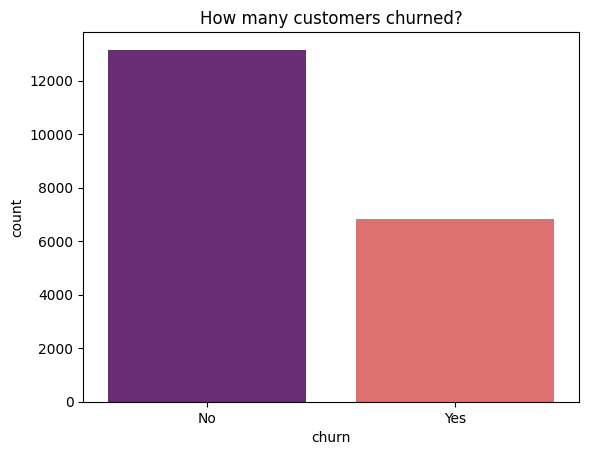

In [33]:
sns.countplot(data=df, x='churn', palette='magma')
plt.title('How many customers churned?')
plt.show()

/var/folders/nq/_1b2y5rx30j7x159s1dycdfm0000gn/T/ipykernel_44074/1225189927.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='churn', y='monthly_charges', palette='Set2')


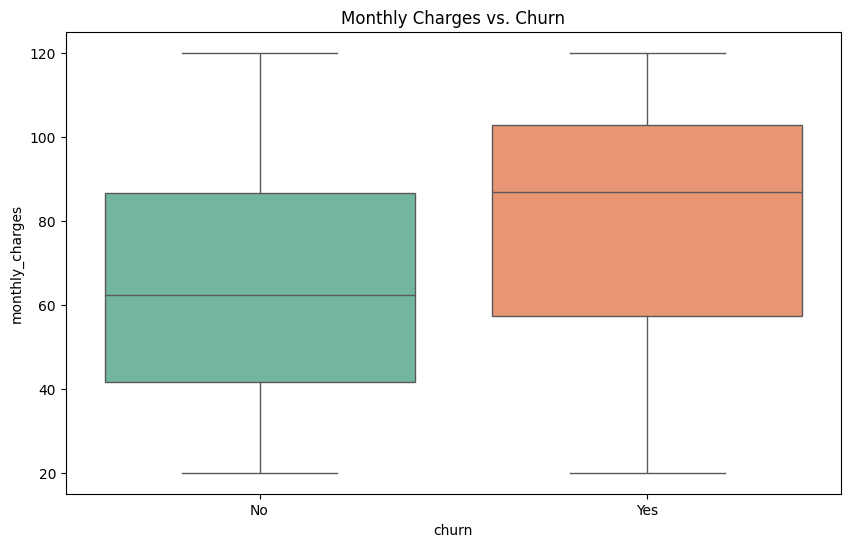

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='churn', y='monthly_charges', palette='Set2')
plt.title('Monthly Charges vs. Churn')
plt.show()

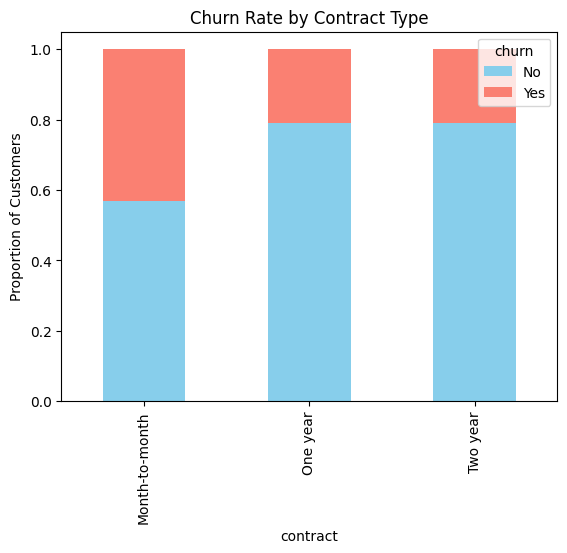

In [35]:
contract_churn = pd.crosstab(df['contract'], df['churn'], normalize='index')
contract_churn.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.title('Churn Rate by Contract Type')
plt.ylabel('Proportion of Customers')
plt.show()